In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
import scipy.stats as stats
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics

from sklearn.naive_bayes import GaussianNB
import joblib

In [2]:
data = pd.read_csv("E:\\Dibyendu\Projects\\1. Machine Learning Projects\\Heart Disease Project-1\\Prepared_data\\Heart Disease.csv")

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,1.0,1
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,2.0,1
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,2.0,1
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0.0,2.0,1
4,57,0,0,120.0,354.0,0,1,163.0,1,0.6,2,0.0,2.0,1


In [3]:
X = data.drop('target', axis=1)
Y = data['target']

In [4]:
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size= 0.25, random_state = 355)

In [5]:
gNB = GaussianNB()

gNB.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [6]:
# For Train Data

y_predict = gNB.predict(x_train)

print("Based On trian Data\n\n")
print("Confusion_matrix: \n",confusion_matrix(y_train, y_predict), '\n')
print("Accuracy_score: ", accuracy_score(y_train, y_predict), '\n')
print("classification_report: \n\n", classification_report(y_train, y_predict))

Based On trian Data


Confusion_matrix: 
 [[ 82  24]
 [ 15 106]] 

Accuracy_score:  0.8281938325991189 

classification_report: 

               precision    recall  f1-score   support

           0       0.85      0.77      0.81       106
           1       0.82      0.88      0.84       121

    accuracy                           0.83       227
   macro avg       0.83      0.82      0.83       227
weighted avg       0.83      0.83      0.83       227



0.8248089817558085

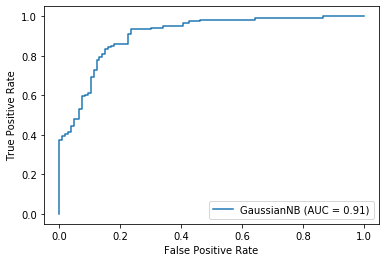

In [7]:
metrics.plot_roc_curve(gNB, x_train, y_train)
metrics.roc_auc_score(y_train, y_predict, average=None)

In [8]:
# For Test Data

y_predict1 = gNB.predict(x_test)

print("Based On test Data\n\n")
print("Confusion_matrix: \n",confusion_matrix(y_test, y_predict1), '\n')
print("Accuracy_score: ", accuracy_score(y_test,y_predict1), '\n')
print("classification_report: \n\n", classification_report(y_test,y_predict1))

Based On test Data


Confusion_matrix: 
 [[26  6]
 [ 6 38]] 

Accuracy_score:  0.8421052631578947 

classification_report: 

               precision    recall  f1-score   support

           0       0.81      0.81      0.81        32
           1       0.86      0.86      0.86        44

    accuracy                           0.84        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76



0.8380681818181819

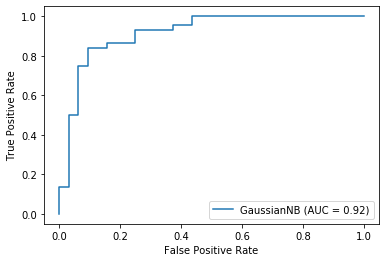

In [9]:
metrics.plot_roc_curve(gNB, x_test, y_test)
metrics.roc_auc_score(y_test, y_predict1, average=None)

# Here using Gaussian Naive Bias Classifier,


    for train data:--
        
        accuracy score is: 82% (***)
        precision is:  83%
        recall is: 83%

            
    for test data:--
        
        accuracy score is: 84% (***)
        precision is:  84%
        recall is: 84%
            
            
# Therefore we can say that my Model is a Generalized Model (low bias and low variance)

In [10]:
# Model Dumping


joblib.dump(gNB, "E:\\Dibyendu\Projects\\1. Machine Learning Projects\\Heart Disease Project-1\\Models_save\\gaussianNB.pkl")


['E:\\Dibyendu\\Projects\\1. Machine Learning Projects\\Heart Disease Project-1\\Models_save\\gaussianNB.pkl']